# MOF ChemUnity Property Extraction

This notebook demonstrates how the property extraction in MOF ChemUnity is used. You need to have the MOF name that you want to extract properties for which is obtained from the Matching workflow.

In [2]:
from src.MOF_ChemUnity.Agents.ExtractionAgent import ExtractionAgent
from src.MOF_ChemUnity.utils.DataPrep import Data_Prep
from src.MOF_ChemUnity.Extraction_Prompts import VERIFICATION, RECHECK, EXTRACTION
from src.MOF_ChemUnity.Water_Stability_Prompts import WATER_STABILITY, RULES_WATER_STABILITY, VERF_RULES_WATER_STABILITY, WATER_STABILITY_RE

### Preparation of MOF Names from Matching CSV

we need to read the matching csv file and extract the file names from within that.

In [1]:
import pandas as pd
import glob
import os

In [33]:
mof_names_df = pd.read_csv("./tests/water_stability_benchmark/case-study-3-ground-truth.csv")
mof_names_df.head()

,Reference,DOI,MOF contained,True Water Stability,Justification Sentence,Unnamed: 5
0,1,10.1038/s41586-019-1798-7,Al-PMOF/m8o66,Stable,The capture capacity of Al-PMOF for a mixture ...,NaN
1,1,10.1038/s41586-019-1798-7,Al-PyrMOF/m8o67,Stable,The capture capacity of Al-PyrMOF for a mixtur...,NaN
2,1,10.1038/s41586-019-1798-7,UiO-66-NH2,Not provided,Not provided,NaN
3,1,10.1038/s41586-019-1798-7,m8o71,Unstable,"Conversely, m8o71 completely loses its CO2 cap...",NaN
4,2,10.1039/c0dt00999g,[Zn4(dmf)(ur)2(ndc)4],Stable,The high stability of the guest-free metal–org...,NaN


### Markdown files setup

In [34]:
input_folder = "./tests/water_stability_benchmark/markdown"


files = glob.glob(input_folder+"/*/*.md")

In [35]:
mof_names_df["File"] = [input_folder+f"/{i}/{i}.md" for i in list(mof_names_df["Reference"])]
mof_names_df.head()

,Reference,DOI,MOF contained,True Water Stability,Justification Sentence,Unnamed: 5,File
0,1,10.1038/s41586-019-1798-7,Al-PMOF/m8o66,Stable,The capture capacity of Al-PMOF for a mixture ...,NaN,./tests/water_stability_benchmark/markdown/1/1.md
1,1,10.1038/s41586-019-1798-7,Al-PyrMOF/m8o67,Stable,The capture capacity of Al-PyrMOF for a mixtur...,NaN,./tests/water_stability_benchmark/markdown/1/1.md
2,1,10.1038/s41586-019-1798-7,UiO-66-NH2,Not provided,Not provided,NaN,./tests/water_stability_benchmark/markdown/1/1.md
3,1,10.1038/s41586-019-1798-7,m8o71,Unstable,"Conversely, m8o71 completely loses its CO2 cap...",NaN,./tests/water_stability_benchmark/markdown/1/1.md
4,2,10.1039/c0dt00999g,[Zn4(dmf)(ur)2(ndc)4],Stable,The high stability of the guest-free metal–org...,NaN,./tests/water_stability_benchmark/markdown/2/2.md


### Running the Extraction Loop for General Property Extraction + CoV

In [36]:
with open(".apikeys", 'r') as f:
    os.environ["OPENAI_API_KEY"] = f.read()

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o", temperature=0.1)
parser_llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [37]:
result = {}
result["MOF Name"] = []
result["Ref Code"] = []
result["Property"] = []
result["Value"] = []
result["Units"] = []
result["Condition"] = []
result["Summary"] = []
result["Reference"] = []

In [38]:
filtered_result = {}
filtered_result["MOF Name"] = []
filtered_result["Ref Code"] = []
filtered_result["Property"] = []
filtered_result["Value"] = []
filtered_result["Units"] = []
filtered_result["Condition"] = []
filtered_result["Summary"] = []
filtered_result["Reference"] = []

In [39]:
ws_result = {}
ws_result["MOF Name"] = []
ws_result["Ref Code"] = []
ws_result["Property"] = []
ws_result["Value"] = []
ws_result["Units"] = []
ws_result["Condition"] = []
ws_result["Summary"] = []
ws_result["Reference"] = []

In [40]:
WS_READ = WATER_STABILITY.replace("{RULES}", RULES_WATER_STABILITY)
WS_CHECK = VERIFICATION.replace("{VERF_RULES}", VERF_RULES_WATER_STABILITY)
WS_RECHECK = RECHECK.replace("{RECHECK_INSTRUCTIONS}", WATER_STABILITY_RE.replace("{RULES}", RULES_WATER_STABILITY))

sp_dict = {"read_prompts": [WS_READ], "verification_prompts": [WS_CHECK], "recheck_prompts": [WS_RECHECK]}

In [41]:
from src.MOF_ChemUnity.utils.DocProcessor import DocProcessor

agent = ExtractionAgent(llm=llm)

In [43]:
for i in range(len(mof_names_df)):

    mof = mof_names_df.iloc[i]["MOF contained"].replace("{", "[").replace("}", "]")
    refcode = "HELLOW"
    reference = mof_names_df.iloc[i]["DOI"]
    
    _, response = agent.agent_response(mof, mof_names_df.iloc[i]["File"],
                                    EXTRACTION, ["Water Stability"], sp_dict, CoV=True, skip_general=True, fuzz_threshold=85, store_vs=True)
    
    # general_extraction = response

    # filtered = general_extraction[0]
    # all_props = general_extraction[1]

    # print(filtered)
    # print(all_props)

    # for j in filtered:
    #     filtered_result["MOF Name"].append(mof)
    #     filtered_result["Ref Code"].append(refcode)
    #     filtered_result["Reference"].append(reference)
    #     filtered_result["Property"].append(j.name)
    #     filtered_result["Units"].append(j.units)
    #     filtered_result["Value"].append(j.value)
    #     filtered_result["Condition"].append(j.condition)
    #     filtered_result["Summary"].append(j.summary)
    # for j in all_props.properties:
    #     result["MOF Name"].append(mof)
    #     result["Ref Code"].append(refcode)
    #     result["Reference"].append(reference)
    #     result["Property"].append(j.name)
    #     result["Units"].append(j.units)
    #     result["Value"].append(j.value)
    #     result["Condition"].append(j.condition)
    #     result["Summary"].append(j.summary)
    
    specific_extraction = response

    ws = specific_extraction[0]

    for j in ws:
        ws_result["MOF Name"].append(mof)
        ws_result["Ref Code"].append(refcode)
        ws_result["Reference"].append(reference)
        ws_result["Property"].append(j.name)
        ws_result["Units"].append(j.units)
        ws_result["Value"].append(j.value)
        ws_result["Condition"].append(j.condition)
        ws_result["Summary"].append(j.summary)



# all_props = pd.DataFrame(result)
# filtered = pd.DataFrame(filtered_result)
ws = pd.DataFrame(ws_result)
    

Saved vector store for ./tests/water_stability_benchmark/markdown/1/1.md in ./tests/water_stability_benchmark/markdown/vs/1
Reading to find the Water Stability of Al-PMOF/m8o66 specifically
LLM Structured Output: 
Water Stability = StableN/A ; conditions:  ; Justification: "Figure 3c, d shows no loss of crystallinity upon activation as well as upon exposure to different harsh conditions, including immersion in water for 7 days." "The ability of these materials to capture CO2 from wet flue gases is of important practical concern. We therefore used a breakthrough experiment to determine the capture capacity of both Al-PMOF and Al-PyrMOF for a mixture of CO2/N2 under dry- and humid-conditions." "These results confirm the predictions of the simulations (Extended Data Fig. 7): humidity in the flue gases has only a minimal influence on the capture capacity of Al-PMOF."

Verifying the extraction:
Saved vector store for ./tests/water_stability_benchmark/markdown/1/1.md in ./tests/water_stabili

KeyboardInterrupt: 

In [25]:
ws = pd.DataFrame(ws_result)

In [30]:
ws.to_csv("/mnt/c/Users/Amro/Desktop/ws_no_hallucination_slightly_bettter_prompt_hope_for_the_best.csv")

## Performance Metrics

In [2]:
case_3 = pd.read_csv("./tests/water_stability_benchmark/case-study-3-ground-truth.csv")
case_3.head()

,Reference,DOI,MOF contained,True Water Stability,Justification Sentence,Unnamed: 5
0,1,10.1038/s41586-019-1798-7,Al-PMOF/m8o66,Stable,The capture capacity of Al-PMOF for a mixture ...,NaN
1,1,10.1038/s41586-019-1798-7,Al-PyrMOF/m8o67,Stable,The capture capacity of Al-PyrMOF for a mixtur...,NaN
2,1,10.1038/s41586-019-1798-7,UiO-66-NH2,Not provided,Not provided,NaN
3,1,10.1038/s41586-019-1798-7,m8o71,Unstable,"Conversely, m8o71 completely loses its CO2 cap...",NaN
4,2,10.1039/c0dt00999g,[Zn4(dmf)(ur)2(ndc)4],Stable,The high stability of the guest-free metal–org...,NaN


In [ ]:
ws = pd.read_csv("/mnt/c/Users/Amro/Desktop/ws_no_hallucination.csv")

In [ ]:
ws = pd.read_csv("/mnt/c/Users/Amro/Desktop/ws.csv")

In [3]:
results_df = pd.read_csv("./tests/water_stability_benchmark/ws_no_hallucination_slightly_bettter_prompt_hope_for_the_best.csv")
ws = results_df

In [5]:
ws24_benchmark = pd.read_csv("./ws24_benchmark_results.csv")

In [42]:
from openai import OpenAI

with open(".apikey", 'r') as f:
    client = OpenAI(api_key=f.read())

def prob_unstable(justification: str):
    correction = client.chat.completions.create(model="gpt-4o-mini", temperature=0.1,
                                            messages=[{"role": "system", "content": 
                                                       "You are an expert in metal-organic frameworks and chemical studies. You will be shown a justification for the water stability label of a metal-organic framework. You need to determine the probability or confidence that the metal-organic framework is unstable based on it.\nTo help you with the probability, follow these rules:\n1- water insoluble means water stable\n2- any solvent other than water or dilute water solutions do not impact water stability\n3- stability in humid environments counts as water stability.\n4- changes in properties, color, crystal structure, PXRD peaks, diffractions after some exposure to humidity or water impact water stability based on magnitude. (For example, minor changes to PXRD should not have the same impact as drastic changes)\n5- Loss of crystallinity after dehydration post-water immersion or exposure to humidity is a sign of unstable!\n6- If the justification clearly states 'stable', 'unstable', 'soluble' and 'insoluble', these keywords should have the highest impact. (Again, you have to adjust the impact based on the words used alongside these keywords. For example, 'slightly soluble' should have less of an impact than 'very soluble') \nYou are only allowed to analyze the justification given to you by the user.\nOnly return the probability as a float between 0 and 1. Do not give any reasoning or justification, otherwise you fail."},
                                                       {"role": "user", "content": f"Here is the justification:\n{justification}"}])
    prob = float(correction.choices[0].message.content)

    return prob

In [44]:
ws["LLM Confidence"] = ws["Summary"].apply(lambda x: prob_unstable(x))

In [55]:
th = 0.5
ws["LLM Corrected Label"] = ws["LLM Confidence"].apply(lambda x: "Unstable" if x >= th else "Stable")

In [59]:
import numpy as np

matrix = np.zeros((3,3))
use_corrected = True

for i in range(len(ws)):
    y_index = 0
    x_index = 0

    llm_initial = ws.iloc[i]["Value"].lower()
    llm_corrected = ws.iloc[i]["LLM Corrected Label"].lower()

    if llm_initial.lower() == "unstable" and use_corrected:
        llm = llm_corrected
    else:
        llm = llm_initial


    if(case_3.iloc[i]["True Water Stability"].lower() == "unstable"): y_index = 0
    elif(case_3.iloc[i]["True Water Stability"].lower() == "stable"): y_index = 1 
    else: y_index = 2
    if(llm == "unstable"): x_index = 0
    elif(llm == "stable"): x_index = 1 
    else: x_index = 2

    # if (y_index == 1 and x_index == 0):
    #     print("\n\n")
    #     print(ws.loc[i, "Summary"])

    matrix[y_index, x_index] += 1

add_ws24 = False
for i in range(len(ws24_benchmark)):
    chemunity = ws24_benchmark.loc[i, "ChemUnity Stability"]
    ws24 = ws24_benchmark.loc[i, "WS Stability"]

    if chemunity.lower() == "stable":
        chemunity_index = 1
    else:
        chemunity_index = 0
    
    if ws24.lower() == "stable":
        ws_index = 1
    else:
        ws_index = 0
    
    if add_ws24:
        matrix[ws_index, chemunity_index] += 1

In [60]:
recall = np.zeros(3)
precision = np.zeros(3)
false_positives = np.zeros(3)
false_negatives = np.zeros(3)
true_positives = np.zeros(3)


for k in range(3):
    for i in range(3):
        if i != k:
            false_positives[k] += matrix[i, k]
            false_negatives[k] += matrix[k, i]

    true_positives[k] += matrix[k,k]
    precision[k] = matrix[k,k]/(matrix[k,k] + false_positives[k])
    recall[k] = matrix[k,k]/(matrix[k,k] + false_negatives[k])

micro_precision = np.sum(true_positives)/(np.sum(true_positives)+np.sum(false_positives))
micro_recall = np.sum(true_positives)/(np.sum(true_positives)+np.sum(false_negatives))


In [61]:
print("\t\t\tPred. Unstable\tPred. Stable\tNP\n\tTrue Unstable\t\t{0}\t{1}\t\t{2}\n\tTrue Stable\t\t{3}\t{4}\t\t{5}\n\tNP\t\t\t{6}\t{7}\t\t{8}".format(*matrix.flatten()))
print("Accuracy: {0:0.00%}\n".format(np.sum([matrix[i,i] for i in range(3)])/np.sum(matrix)))
print("Recalls: Unstable {0:0.00%}\t\tStable {1:0.00%}\t\tNot Provided {2:0.00%}".format(*recall.flatten()))
print("Precision: Unstable {0:0.00%}\t\tStable {1:0.00%}\t\tNot Provided {2:0.00%}".format(*precision.flatten()))

			Pred. Unstable	Pred. Stable	NP
	True Unstable		28.0	6.0		4.0
	True Stable		7.0	88.0		29.0
	NP			6.0	6.0		197.0
Accuracy: 84%

Recalls: Unstable 74%		Stable 71%		Not Provided 94%
Precision: Unstable 68%		Stable 88%		Not Provided 86%


In [53]:
incorrect = pd.DataFrame(incorrect)

In [22]:
incorrect.to_csv("./wrong_stuff.csv")

In [23]:
import matplotlib.pyplot as plt

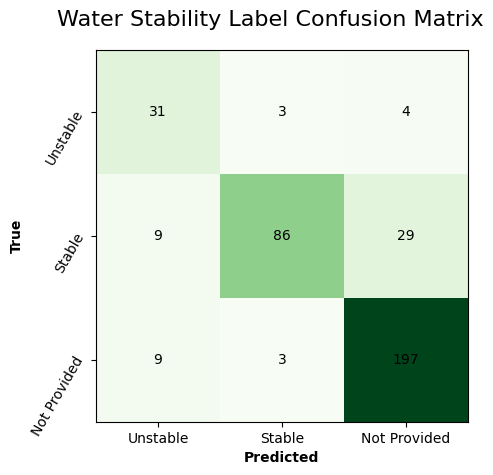

In [54]:
fig, ax = plt.subplots()
ax.imshow(matrix, cmap="Greens", interpolation="nearest")
fig.suptitle("Water Stability Label Confusion Matrix", fontsize=16)
ax.set_xticks(ticks=np.arange(3), labels=["Unstable", "Stable", "Not Provided"], fontsize=10)
ax.set_yticks(ticks=np.arange(3), labels=["Unstable", "Stable", "Not Provided"], fontsize=10, rotation=60)
ax.set_xlabel("Predicted", fontsize=10, fontweight="bold")
ax.set_ylabel("True", fontsize=10, fontweight="bold")

for j in range(3):
    for i in range(3):
        ax.text(j, i, f"{matrix[i,j]:0n}", ha="center", va="center", color="black")

plt.tight_layout(rect=[0,0,1,1])

plt.savefig("/mnt/c/Users/Amro/Downloads/Water_Stability_Eunomia.png")

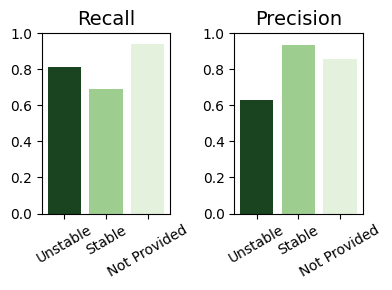

In [41]:
categories = ["Unstable", "Stable", "Not Provided"]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(4,3))
ax1.set_title("Recall", fontsize=14)
ax1.bar(categories, recall, color=['#1a431f', "#9dce90", "#e4f2dd"])
ax1.set_ylim([0, 1])

ax1.set_xticks(categories)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)


ax2.set_title("Precision", fontsize=14)
ax2.bar(categories, precision, color=['#1a431f', "#9dce90", "#e4f2dd"])
ax2.set_ylim([0, 1])

ax2.set_xticks(categories)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)

plt.tight_layout()
plt.savefig("/mnt/c/Users/Amro/Downloads/Water_Stability_Labels_Series.png")